# 最小二乘法剖析——理论和数学（Part 1）代码部分

> 作者：才JackZhang
>
> 公众号：数据派探险家

**Tips**：只是使用代码而不阅读文章可能会导致混淆或错误发生

**文章地址**：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
### 只有你使用的是“暗黑模式”才运行这个单元

# svg plots (higher-res)
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

plt.rcParams.update({
    'figure.facecolor': '#383838',
    'figure.edgecolor': '#383838',
    'axes.facecolor':   '#383838',
    'axes.edgecolor':   '#DDE2F4',
    'axes.labelcolor':  '#DDE2F4',
    'xtick.color':      '#DDE2F4',
    'ytick.color':      '#DDE2F4',
    'text.color':       '#DDE2F4',
    'axes.spines.right': False,
    'axes.spines.top':   False,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
})

## 回归图和术语

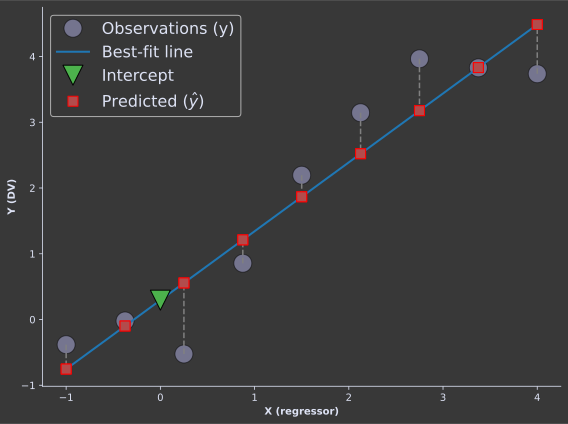

In [3]:
# 示例数据
N = 9
x = np.linspace(-1, 4, N)
y = 1 + x + np.random.randn(N)

# 拟合模型&获取预测
X = np.vstack((np.ones(N), x)).T
betas = np.linalg.lstsq(X, y, rcond=None)[0]

# 获得预测
yHat = X@betas

# 绘图
_, axs = plt.subplots(1, 1, figsize=(8, 6))

# 绘制数据
axs.plot(x, y, 'ko', markerfacecolor=[.7, .7, .9], markersize=18, alpha=0.5, label='Observations (y)')
axs.set(xlabel='X (regressor)', ylabel='Y (DV)')

# 画回归线
axs.plot(x, yHat, linewidth=2, label='Best-fit line')

# 画截距
axs.plot(0, betas[0], 'kv', markersize=20, markerfacecolor=[.3, .7, .3], label='Intercept', zorder=10)

# 特定数据点的投影线
for i in range(N):
    axs.plot([x[i], x[i]], [y[i], yHat[i]], '--', color='gray')
    axs.plot([x[i], x[i]], [yHat[i], yHat[i]], 'rs', markersize=10, markerfacecolor=[.7, .3, .3], label=r'Predicted ($\hat{y}$)')

# 最后调整
labh, labels = axs.get_legend_handles_labels() # 为了防止冗余的 ‘Predited’ 标签
axs.legend(labh[:4], labels[:4], fontsize=16)

plt.tight_layout()
plt.savefig('fig1.png')
plt.show()

## 一个有趣的例子：匈牙利朋克音乐 vs 生活幸福感

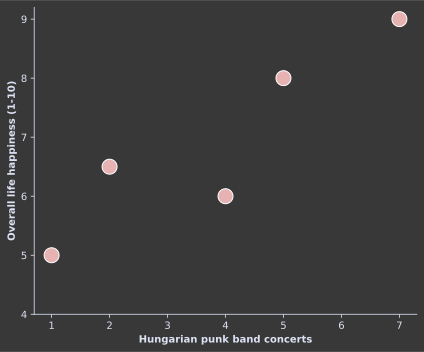

In [4]:
# 示例数据
HungarianPunk = np.array([1, 2, 4, 5, 7])
happiness = np.array([5, 6.5, 6, 8, 9])
n = len(HungarianPunk)

# 绘图
plt.figure(figsize=(6, 5))
plt.plot(HungarianPunk, happiness, 'wo', markerfacecolor=[.9, .7, .7], markersize=15)
plt.gca().set(xlabel='Hungarian punk band concerts', 
              ylabel='Overall life happiness (1-10)',
              yticks=range(4, 10))

plt.tight_layout()
plt.savefig('fig2.png')
plt.show()

In [5]:
# 将匈牙利音乐会转化为 numpy 数组
X = np.vstack((np.ones(n), HungarianPunk)).T
y = happiness

# 最小二乘解
beta = np.linalg.inv(X.T@X) @ X.T @ y
print(f'beta = {beta}')

beta = [4.58333333 0.60964912]


In [6]:
# 设计矩阵
print(f'The design matrix:\n{X}')

The design matrix:
[[1. 1.]
 [1. 2.]
 [1. 4.]
 [1. 5.]
 [1. 7.]]


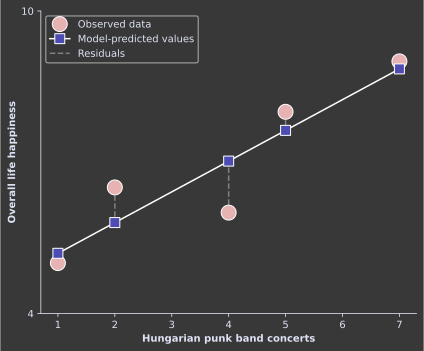

In [7]:
# 模型的预测值 = 设计矩阵 × beta 系数
predictions = X@beta

# 可视化
plt.figure(figsize=(6, 5))
plt.plot(HungarianPunk, happiness, 'wo', markerfacecolor=[.9, .7, .7], markersize=15, label='Observed data')
plt.plot(HungarianPunk, predictions, 'ws-', markerfacecolor=[.3, .3, .7], markersize=10, label='Model-predicted values')

for i in range(n):
    plt.plot([HungarianPunk[i], HungarianPunk[i]], 
             [happiness[i], predictions[i]],
             '--', color='gray', zorder=-4)
plt.plot(4, 6, '--', color='gray', label='Residuals')

plt.legend()
plt.gca().set(xlabel='Hungarian punk band concerts', ylabel='Overall life happiness',
              yticks=(4, 10))
plt.tight_layout()
plt.savefig('fig3.png')
plt.show()

In [8]:
# 残差向量
residuals = y - predictions

# 残差之和为零（在计算机精度容差范围内）
residuals.sum()

np.float64(-1.687538997430238e-14)